In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

url = 'http://equijar.com/index.php?route=estadisticas/jinetes&anno='

In [44]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

ano = ['2019', '2020', '2021', '2022', '2023', '2024']
response = []
for i in range(len(ano)):
    year_url = url + ano[i]
    content = requests.get(year_url, headers=headers)
    response.append(content.content)

In [45]:
# Parsear el HTML
soup = []
for i in range(len(response)):
    soup_data = BeautifulSoup(response[i], 'html.parser')
    soup.append(soup_data)

# Encontrar la tabla que contiene los datos de los jinetes
table_2019 = soup[0].find('table', class_='custom')
table_2020 = soup[1].find('table', class_='custom')
table_2021 = soup[2].find('table', class_='custom')
table_2022 = soup[3].find('table', class_='custom')
table_2023 = soup[4].find('table', class_='custom')
table_2024 = soup[5].find('table', class_='custom')

headers = []
for th in table_2019.find_all('th'):
    headers.append(th.text.strip())

data_2019 = []
data_2020 = []
data_2021 = []
data_2022 = []
data_2023 = []
data_2024 = []

for row in table_2019.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2019.append(cols)

for row in table_2020.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2020.append(cols)

for row in table_2021.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2021.append(cols)

for row in table_2022.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2022.append(cols)

for row in table_2023.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2023.append(cols)

for row in table_2024.find('tbody').find_all('tr'):
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data_2024.append(cols)

# Eliminar las celdas vacías
for i in range(len(data_2019)):
    data_2019[i].remove('')

for i in range(len(data_2020)):
    data_2020[i].remove('')

for i in range(len(data_2021)):
    data_2021[i].remove('')

for i in range(len(data_2022)):
    data_2022[i].remove('')

for i in range(len(data_2023)):
    data_2023[i].remove('')

for i in range(len(data_2024)):
    data_2024[i].remove('')

df_2019 = pd.DataFrame(data_2019, columns=headers)
df_2020 = pd.DataFrame(data_2020, columns=headers)
df_2021 = pd.DataFrame(data_2021, columns=headers)
df_2022 = pd.DataFrame(data_2022, columns=headers)
df_2023 = pd.DataFrame(data_2023, columns=headers)
df_2024 = pd.DataFrame(data_2024, columns=headers)

c:\Python311\Lib\html\parser.py:170: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [46]:
# Función para separar victorias y porcentaje
def separar_victorias(valor):
    # Buscar el número total y el porcentaje usando una expresión regular
    match = re.match(r'(\d+)\s*\(([\d.]+)%\)', valor)
    if match:
        victorias_totales = int(match.group(1))
        porcentaje = float(match.group(2))
        return victorias_totales, porcentaje
    else:
        return None, None

# Añadir columnas totales int y totales porcentaje
# Victorias
df_2019['Victorias_Totales'], df_2019['Porcentaje_Victorias'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Victorias_Totales'], df_2020['Porcentaje_Victorias'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Victorias_Totales'], df_2021['Porcentaje_Victorias'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Victorias_Totales'], df_2022['Porcentaje_Victorias'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Victorias_Totales'], df_2023['Porcentaje_Victorias'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Victorias_Totales'], df_2024['Porcentaje_Victorias'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Segundos
df_2019['Segundos_Totales'], df_2019['Porcentaje_Segundos'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Segundos_Totales'], df_2020['Porcentaje_Segundos'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Segundos_Totales'], df_2021['Porcentaje_Segundos'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Segundos_Totales'], df_2022['Porcentaje_Segundos'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Segundos_Totales'], df_2023['Porcentaje_Segundos'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Segundos_Totales'], df_2024['Porcentaje_Segundos'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Terceros
df_2019['Terceros_Totales'], df_2019['Porcentaje_Terceros'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Terceros_Totales'], df_2020['Porcentaje_Terceros'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Terceros_Totales'], df_2021['Porcentaje_Terceros'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Terceros_Totales'], df_2022['Porcentaje_Terceros'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Terceros_Totales'], df_2023['Porcentaje_Terceros'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Terceros_Totales'], df_2024['Porcentaje_Terceros'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Cuartos
df_2019['Cuartos_Totales'], df_2019['Porcentaje_Cuartos'] = zip(*df_2019['Victorias'].apply(separar_victorias))
df_2020['Cuartos_Totales'], df_2020['Porcentaje_Cuartos'] = zip(*df_2020['Victorias'].apply(separar_victorias))
df_2021['Cuartos_Totales'], df_2021['Porcentaje_Cuartos'] = zip(*df_2021['Victorias'].apply(separar_victorias))
df_2022['Cuartos_Totales'], df_2022['Porcentaje_Cuartos'] = zip(*df_2022['Victorias'].apply(separar_victorias))
df_2023['Cuartos_Totales'], df_2023['Porcentaje_Cuartos'] = zip(*df_2023['Victorias'].apply(separar_victorias))
df_2024['Cuartos_Totales'], df_2024['Porcentaje_Cuartos'] = zip(*df_2024['Victorias'].apply(separar_victorias))

# Verificar el resultado
#print(df_2019[['Victorias', 'Victorias_Totales', 'Porcentaje_Victorias']])

In [47]:
# Agrego la columna ano
df_2019['ano'] = 2019
df_2020['ano'] = 2020
df_2021['ano'] = 2021
df_2022['ano'] = 2022
df_2023['ano'] = 2023
df_2024['ano'] = 2024

In [48]:
# Extraigo los top 10 de cada año
df_2019_top10 = df_2019.head(10)
df_2020_top10 = df_2020.head(10)
df_2021_top10 = df_2021.head(10)
df_2022_top10 = df_2022.head(10)
df_2023_top10 = df_2023.head(10)
df_2024_top10 = df_2024.head(10)

df_total = pd.concat([df_2019_top10, df_2020_top10, df_2021_top10, df_2022_top10, df_2023_top10, df_2024_top10], ignore_index=True)

In [49]:
# Printear un año especifico
print(df_2021_top10)

  Pos         Nombre Carreras    Victorias     Segundos     Terceros  \
0   1        R.Sousa      290  57 (19.66%)  34 (11.72%)  54 (18.62%)   
1   2      V.Janacek      262  46 (17.56%)  38 (14.50%)  44 (16.79%)   
2   3        B.Fayos      231  43 (18.61%)  46 (19.91%)  32 (13.85%)   
3   4     J.Gelabert      244  37 (15.16%)  40 (16.39%)   23 (9.43%)   
4   5   J.L.Martínez      149  28 (18.79%)   11 (7.38%)  26 (17.45%)   
5   6    V. Alonso V      100  23 (23.00%)  15 (15.00%)    6 (6.00%)   
6   7  M.E.Fernández      150  20 (13.33%)  21 (14.00%)  20 (13.33%)   
7   8     J.Zambudio      121  16 (13.22%)  15 (12.40%)  16 (13.22%)   
8   9        R.Ramos      167   15 (8.98%)   14 (8.38%)  22 (13.17%)   
9  10    J.L.Borrego      115  15 (13.04%)    9 (7.83%)   11 (9.57%)   

       Cuartos    Euros  Victorias_Totales  Porcentaje_Victorias  \
0  30 (10.34%)  606.660                 57                 19.66   
1  32 (12.21%)  537.650                 46                 17.56   
2  

In [50]:
# Mostrar todas las filas
pd.set_option('display.max_rows', None)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

print(df_total)

   Pos           Nombre Carreras    Victorias     Segundos     Terceros  \
0    1        V.Janacek      351  68 (19.37%)  63 (17.95%)  59 (16.81%)   
1    2          R.Sousa      324  66 (20.37%)  53 (16.36%)  41 (12.65%)   
2    3          B.Fayos      315  57 (18.10%)  54 (17.14%)  36 (11.43%)   
3    4       J.Gelabert      325  41 (12.62%)   31 (9.54%)  42 (12.92%)   
4    5     J.L.Martínez      156  26 (16.67%)  26 (16.67%)  23 (14.74%)   
5    6        R.N.Valle      151   15 (9.93%)  17 (11.26%)  16 (10.60%)   
6    7     F.Jiménez A.      172   14 (8.14%)   14 (8.14%)  20 (11.63%)   
7    8      J.L.Borrego      128  13 (10.16%)  14 (10.94%)    9 (7.03%)   
8    9   V.M.Valenzuela      150   12 (8.00%)   11 (7.33%)   14 (9.33%)   
9   10      I.Melgarejo      137   10 (7.30%)  22 (16.06%)  19 (13.87%)   
10   1        V.Janacek      272  53 (19.49%)  41 (15.07%)  46 (16.91%)   
11   2          R.Sousa      244  47 (19.26%)  29 (11.89%)  32 (13.11%)   
12   3          B.Fayos  

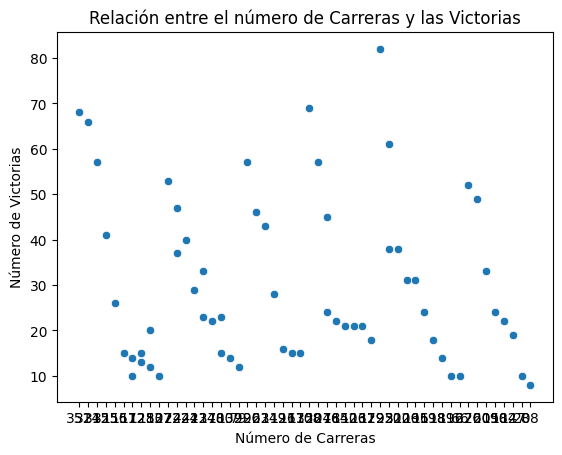

In [53]:
# Relación entre carreras y victorias
sns.scatterplot(data=df_total, x='Carreras', y='Victorias_Totales')
plt.title('Relación entre el número de Carreras y las Victorias')
plt.xlabel('Número de Carreras')
plt.ylabel('Número de Victorias')
plt.show()

In [55]:
# Calcular el coeficiente de correlación
correlacion = df_total['Carreras'].corr(df_total['Victorias_Totales'])
print(f"Coeficiente de correlación entre Carreras y Victorias: {correlacion}")

Coeficiente de correlación entre Carreras y Victorias: 0.836397119891179


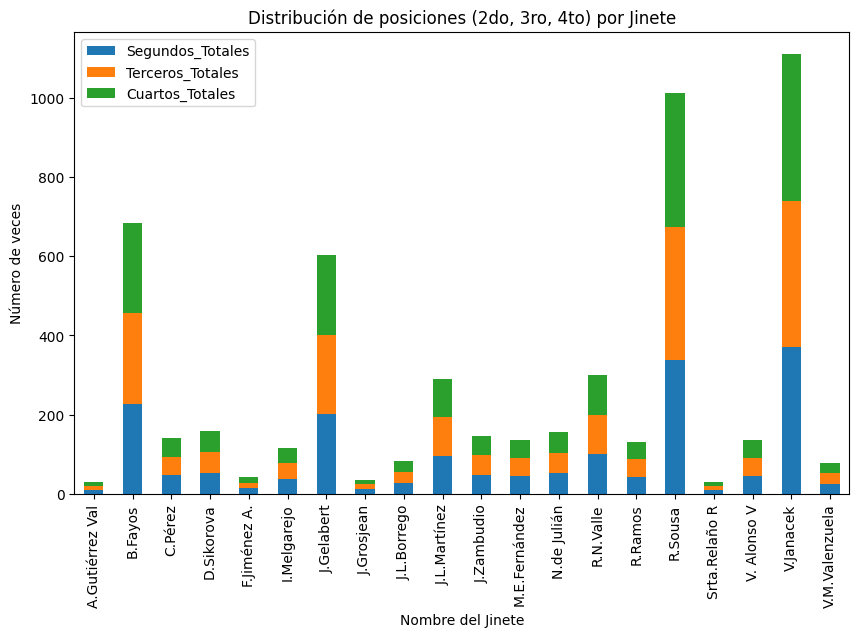

In [56]:
# Visualizar el número de veces que un jinete ha terminado en cada posición
df_posiciones = df_total[['Nombre', 'Segundos_Totales', 'Terceros_Totales', 'Cuartos_Totales']].groupby('Nombre').sum()

df_posiciones.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de posiciones (2do, 3ro, 4to) por Jinete')
plt.xlabel('Nombre del Jinete')
plt.ylabel('Número de veces')
plt.show()

In [62]:
# Agrupar por 'Nombre' y sumar las victorias totales
ranking_victorias = df_total.groupby('Nombre')['Victorias_Totales'].sum().reset_index()

# Ordenar por el número total de victorias en orden descendente
ranking_victorias = ranking_victorias.sort_values(by='Victorias_Totales', ascending=False)

# Tomar el top 10 jinetes
top_10_victorias = ranking_victorias.head(10)

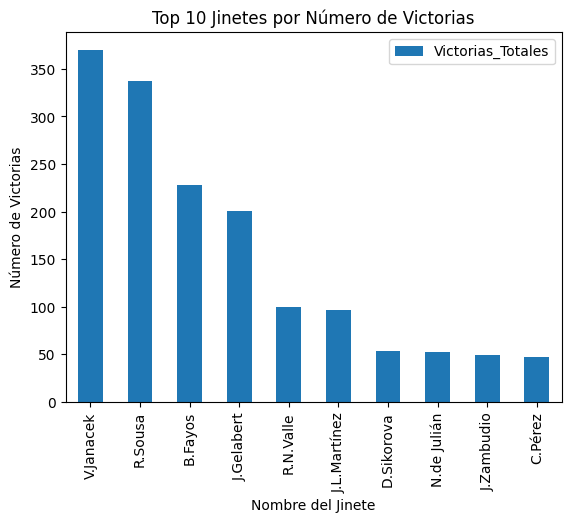

In [63]:
# Graficar el top 10 de jinetes por número de victorias
top_10_victorias.plot(kind='bar', x='Nombre', y='Victorias_Totales', title='Top 10 Jinetes por Número de Victorias')
plt.xlabel('Nombre del Jinete')
plt.ylabel('Número de Victorias')
plt.show()

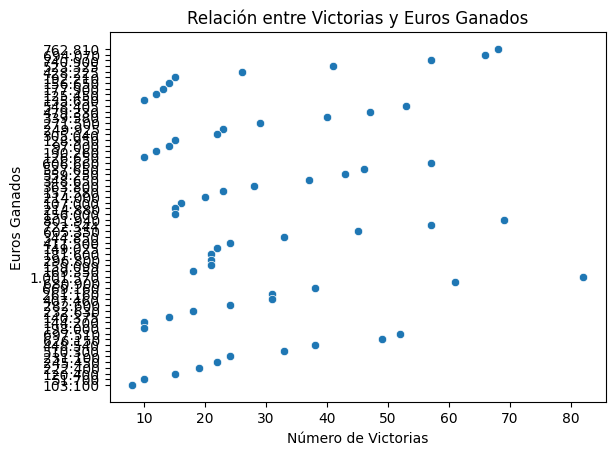

In [60]:
# Relación entre victorias y euros ganados
sns.scatterplot(data=df_total, x='Victorias_Totales', y='Euros')
plt.title('Relación entre Victorias y Euros Ganados')
plt.xlabel('Número de Victorias')
plt.ylabel('Euros Ganados')
plt.show()

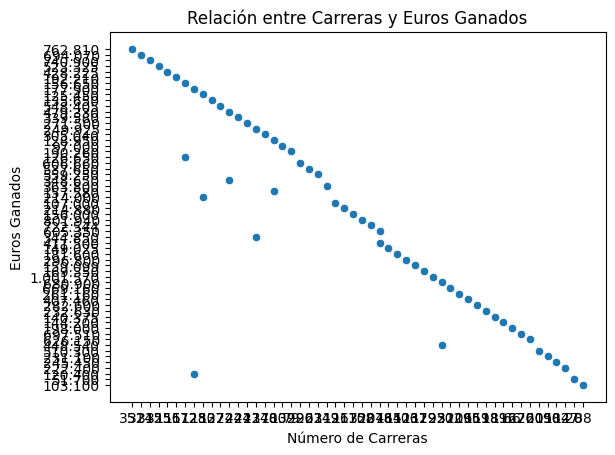

In [61]:
# Relación entre carreras y euros ganados
sns.scatterplot(data=df_total, x='Carreras', y='Euros')
plt.title('Relación entre Carreras y Euros Ganados')
plt.xlabel('Número de Carreras')
plt.ylabel('Euros Ganados')
plt.show()